In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded =files.upload()
df=pd.read_csv("Groceries data.csv")
df.tail(5)


Saving Groceries data.csv to Groceries data (2).csv


,Member_number,Date,itemDescription,year,month,day,day_of_week
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2
38764,1521,2014-12-26,cat food,2014,12,26,4


In [39]:
df.columns


Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [40]:
df = df.drop(columns=['year', 'month', 'day'])


In [41]:
df=df.rename(columns={'itemDescription':'item'})
df.tail(5)

,Member_number,Date,item,day_of_week
38760,4471,2014-08-10,sliced cheese,6
38761,2022,2014-02-23,candy,6
38762,1097,2014-04-16,cake bar,2
38763,1510,2014-03-12,fruit/vegetable juice,2
38764,1521,2014-12-26,cat food,4


In [42]:
df.shape
duplicate_rows_df= df[df.duplicated()]
print("number of duplicates:",duplicate_rows_df.shape)

number of duplicates: (759, 4)


In [43]:

df=df.drop_duplicates()
df.tail(5)
df.count()

,0
Member_number,38006
Date,38006
item,38006
day_of_week,38006


In [44]:
print(df.isnull().sum())


Member_number    0
Date             0
item             0
day_of_week      0
dtype: int64


In [45]:
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].median())
df['Member_number'] = df['Member_number'].fillna(df['Member_number'].median())
print(df.isnull().sum())


Member_number    0
Date             0
item             0
day_of_week      0
dtype: int64


<Axes: xlabel='day_of_week'>

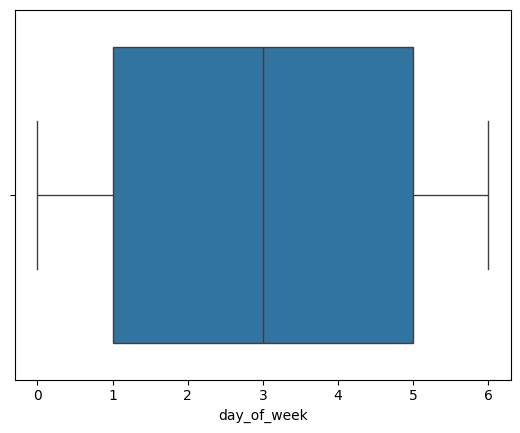

In [46]:
sns.boxplot(x=df['day_of_week'])

In [47]:
numerical_df = df.select_dtypes(include=[np.number])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Member_number    2006.0
day_of_week         4.0
dtype: float64
